<a href="https://colab.research.google.com/github/mr-aditt/Linear-Regression-using-Gradient-Descent-from-scratch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Implemented a linear Regression Model using Batch Gradient Descent and Stochastic Gradient Descent from scratch. Then compared our model with sklearn's Linear Regression Model on the basis of metric called "mean squared error"

**Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as Sk_linear_reg
from sklearn.metrics import mean_squared_error

#I. Initial Step
1. Create User-defined Class for Regression
2. Import and understand dataset

**User-defined Regression Class**

In [2]:
import numpy as np
from math import sqrt


class LinearRegression:

    def __init__(self, lr=0.01, max_iter=100_000, optimizer='bgd', batch_size=128, copy_x=True):
        """
        :param lr: float, Learning Rate
        :param max_iter: int, Max number of iteration or epochs
        :param optimizer: str, 'bgd' <- Batch Gradient Descent
                                'sgd' <- Stochastic Gradient Descent
        :param batch_size: int, Partition training set into small batch size. Applicable only when
                                optimizer = 'sgd'
        :param copy_x: int, Make a copy of predictors
        """

        self.coef_ = 0.0 
        self.intercept_ = 0.0
        self.error_ = list()
        self.lr = lr
        self.max_iter = max_iter
        self.optimizer = optimizer.lower()
        self.batch_size = batch_size if self.optimizer == 'sgd' else None
        self.copy_x = copy_x
    
    @staticmethod
    def mse(y_actual, y_predicted):
        """
        This method calculates the Mean Squared Error.
        :param y_actual: Array, True response
        :param y_predicted: Array, Predicted response
        :return: float, Amount of error
        """
        return (1/len(y_actual))*sum((y_actual-y_predicted)**2)
    
    @staticmethod
    def rmse(y_actual, y_predicted):
        """
        This method calculates the Root Mean Squared Error.
        :param y_actual: Array, True response
        :param y_predicted: Array, Predicted response
        :return: float, Square root of amount of error
        """
        print(type(y_actual))
        return sqrt((1/len(y_actual))*sum((y_actual-y_predicted)**2))
    
    def bgd(self, x, y):
        """
        This is Batch Gradient Descent.
        :param x: Array [n_instances, n_features], Predictors
        :param y: Array [n_instances,], Response
        """
        # 1. Predict y for each instance dataset. y_hat dimension [n_instances,]
        y_hat = np.dot(x, self.coef_) + self.intercept_
        
        # 2. Calculate Loss for current epoch or iteration
        loss = self.mse(y, y_hat)
        self.error_.append(loss)
        
        # 3. Calculate the amount of change needed in
        # coefficients and intercept to reduce the loss.
        j_coef = (-2 / x.shape[0]) * np.dot(x.T, (y - y_hat))
        j_intercept = (-2 / x.shape[0]) * np.sum(y - y_hat)

        # 4. Update the coefficients and intercept
        #  with that change 
        self.coef_ -= self.lr * j_coef
        self.intercept_ -= self.lr * j_intercept
    
    def sgd(self, x, y):
        """
        This is Stochastic Gradient Descent. Per iteration, sgd runs for (n_instances by batch_size) times
        :param x: Array [n_instances, n_features], Predictors
        :param y: Array [n_instances,], Response
        """
        start = 0
        end = self.batch_size
        j_coef, j_intercept, loss = 0.0, 0.0, 0.0

        # This loop runs for ceiling(n_instances by batch_size) times
        while end < x.shape[0]:
            y_hat = np.dot(x[start:end, :], self.coef_) + self.intercept_
            loss += self.mse(y[start:end], y_hat)

            # Accumulate the amount of change needed to get closer to local minima.
            j_coef += (-2 / self.batch_size) * np.dot(x[start:end, :].T, (y[start:end] - y_hat))
            j_intercept += (-2 / self.batch_size) * np.sum(y[start:end] - y_hat)
            start = end
            end += self.batch_size

        self.error_.append(loss)    

        # Update coefficients and intercept with the amount of change needed
        # to get closer to local minima
        self.coef_ -= self.lr * j_coef
        self.intercept_ -= self.lr * j_intercept
    
    def fit(self, x, y):
        """
        This method fits the Regression line on dataset by calling either
        bgd or sgd for max_iter times.
        :param x: Array [n_instances, n_features], Predictors
        :param y: Array [n_instances,], Response
        """
        x = np.asarray(x)
        y = np.asarray(y)
        x_copy = x.copy() if self.copy_x is True else x
        self.coef_ = np.zeros(x_copy.shape[1])

        # Run for max_iter times and calculate optimal coefficients
        # and intercept value
        for e in range(self.max_iter):
            if self.optimizer == 'bgd':
                self.bgd(x_copy, y)
            elif self.optimizer == 'sgd':
                self.sgd(x_copy, y)
    
    def predict(self, x):
        """
        This method predict the response for predictors based on fitted line's
        coefficients and intercept.
        :param x: Array, Predictor
        :return: Array, Predicted response
        """
        x = np.asarray(x)
        return np.dot(x, self.coef_) + self.intercept_

    def __repr__(self):
        return f'\n\nLinearRegression{self.coef_, self.intercept_, self.lr, self.max_iter, self.optimizer}'
    
    def __str__(self):
        return '\n\nClassifier: Linear Regression\nAttributes:\n\tcoefficient: {} \n\tintercept: {:.2f} ' \
               '\n\tlearning_rate: {} \n\tepochs: {:,} \n\toptimizer: {}'.format(self.coef_, self.intercept_, self.lr,
                                                                                 self.max_iter, self.optimizer)


**Looking at dataset**

In [3]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print('Describe Dataset\n', df.describe())

Describe Dataset
                 age           sex  ...            s6      target
count  4.420000e+02  4.420000e+02  ...  4.420000e+02  442.000000
mean  -3.634285e-16  1.308343e-16  ... -3.412882e-16  152.133484
std    4.761905e-02  4.761905e-02  ...  4.761905e-02   77.093005
min   -1.072256e-01 -4.464164e-02  ... -1.377672e-01   25.000000
25%   -3.729927e-02 -4.464164e-02  ... -3.317903e-02   87.000000
50%    5.383060e-03 -4.464164e-02  ... -1.077698e-03  140.500000
75%    3.807591e-02  5.068012e-02  ...  2.791705e-02  211.500000
max    1.107267e-01  5.068012e-02  ...  1.356118e-01  346.000000

[8 rows x 11 columns]


#II. Model

**Create, Train, Predict and Test**

In [4]:
epoch = 10_000
my_clf = LinearRegression(max_iter=epoch, optimizer='bgd')
reg_clf = Sk_linear_reg()

x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.3)
my_clf.fit(x_train, y_train)
reg_clf.fit(x_train, y_train)

my_pred = my_clf.predict(x_test)
reg_pred = reg_clf.predict(x_test)

print(f"User-defined Model's MSE: {my_clf.mse(y_test, my_pred):.3f}")
print(f"Sklearn Model's MSE: {mean_squared_error(y_test, reg_pred):.3f}")

User-defined Model's MSE: 3427.681
Sklearn Model's MSE: 2926.988


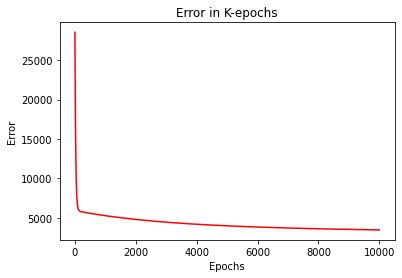

In [5]:
plt.title("Error in K-epochs")
plt.plot(range(epoch), my_clf.error_, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()